## Scatterplot: count versus grit (Well average)

In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
BaseDir = '/Users/chririn/Documents/Code/2D_analysis/results2/'

In [58]:
# Load viabilty data
dfViability = pd.read_csv("{}viability_scores2.csv".format(BaseDir), sep=";", index_col=0)
dfViability.drop(columns=['cmpd_conc'],inplace=True)
dfViability["perturbation"] = dfViability["compound"] + "_" + dfViability.index.astype(str)
dfViability.head(9)

,Count_nuclei,ObjectNumber_nuclei,ObjectNumber_cells,compound,conc,perturbation
0,116.0,89.00,40.00,[tetr],2.50000,[tetr]_0
1,183.0,155.50,70.00,regora,0.00833,regora_1
2,193.0,172.50,74.50,[dmso],0.10000,[dmso]_2
3,128.0,115.00,53.00,cobime,0.10000,cobime_3
4,192.5,164.00,75.00,Encora,0.10000,Encora_4
5,158.0,132.50,55.50,Temozo,1.00000,Temozo_5
6,174.5,132.25,55.25,PI-103,0.03330,PI-103_6
7,124.0,110.00,45.00,PD0325,1.00000,PD0325_7
8,143.0,123.00,49.75,SN-38,0.10000,SN-38_8


In [59]:
# Load grit data
dfGrit = pd.read_csv("{}grit_scores4.csv".format(BaseDir), sep=";", index_col=0)
#dfGrit['cmpd_conc']= dfGrit['compound'] + '_' + dfGrit['conc'].astype(str)
dfGrit.head()

,perturbation,group,grit,compound,conc
0,5-Fluo_136,0.3330,0.228464,5-Fluo,0.3330
1,5-Fluo_147,0.1000,0.498541,5-Fluo,0.1000
2,5-Fluo_165,1.0000,0.518760,5-Fluo,1.0000
3,5-Fluo_214,0.0333,0.439225,5-Fluo,0.0333
4,5-Fluo_220,1.0000,0.132766,5-Fluo,1.0000


In [60]:
ListOfMetaData = list(dfViability.columns.values[-3:])

In [61]:
df = dfViability.merge(dfGrit, on=['conc', 'compound','perturbation'], how='outer')
df.head(50)

,Count_nuclei,ObjectNumber_nuclei,ObjectNumber_cells,compound,conc,perturbation,group,grit
0,116.0,89.00,40.00,[tetr],2.50000,[tetr]_0,2.50000,1.042179
1,183.0,155.50,70.00,regora,0.00833,regora_1,0.00833,-0.514421
2,193.0,172.50,74.50,[dmso],0.10000,[dmso]_2,0.10000,-0.578328
3,128.0,115.00,53.00,cobime,0.10000,cobime_3,0.10000,0.412700
4,192.5,164.00,75.00,Encora,0.10000,Encora_4,0.10000,0.324807
5,158.0,132.50,55.50,Temozo,1.00000,Temozo_5,1.00000,0.227124
6,174.5,132.25,55.25,PI-103,0.03330,PI-103_6,0.03330,0.528007
7,124.0,110.00,45.00,PD0325,1.00000,PD0325_7,1.00000,0.781786
8,143.0,123.00,49.75,SN-38,0.10000,SN-38_8,0.10000,0.222168
9,158.0,124.50,56.00,triflu,0.33300,triflu_9,0.33300,0.122807


In [62]:
dfDMSO = df[df.compound.isin(['[dmso]'])]
norm = dfDMSO[['Count_nuclei', 'ObjectNumber_cells','ObjectNumber_nuclei']].mean()

In [63]:
df['Count_nuclei_norm'] = (df['Count_nuclei'] / norm[0])*100
df['ObjectNumber_cells_norm'] = (df['ObjectNumber_cells'] / norm[1])*100
df['ObjectNumber_nuclei_norm'] = (df['ObjectNumber_nuclei'] / norm[1])*100

In [64]:
df.head()

,Count_nuclei,ObjectNumber_nuclei,ObjectNumber_cells,compound,conc,perturbation,group,grit,Count_nuclei_norm,ObjectNumber_cells_norm,ObjectNumber_nuclei_norm
0,116.0,89.0,40.0,[tetr],2.50000,[tetr]_0,2.50000,1.042179,74.873933,68.543889,152.510152
1,183.0,155.5,70.0,regora,0.00833,regora_1,0.00833,-0.514421,118.120083,119.951805,266.464367
2,193.0,172.5,74.5,[dmso],0.10000,[dmso]_2,0.10000,-0.578328,124.574733,127.662993,295.595520
3,128.0,115.0,53.0,cobime,0.10000,cobime_3,0.10000,0.412700,82.619512,90.820652,197.063680
4,192.5,164.0,75.0,Encora,0.10000,Encora_4,0.10000,0.324807,124.252000,128.519791,281.029943


#### TODO
1) normalize count_nuclei and object_count_number by DMSO
2) generate the scatterplots 
3) color-code by concentration 

Text(0, 0.5, 'Cell Viability - count nuclei')

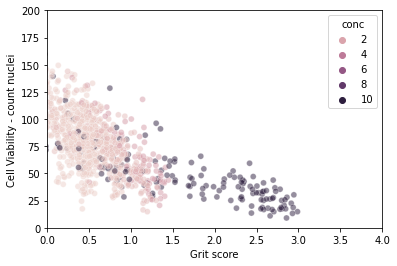

In [82]:
sns.scatterplot(x=df['grit'], y=df['Count_nuclei_norm'], hue=df['conc'], alpha=0.5)
plt.xlim([0, 4])
plt.ylim([0, 200])
plt.xlabel('Grit score')
plt.ylabel('Cell Viability - count nuclei')

Text(0, 0.5, 'Cell Viability - count cells')

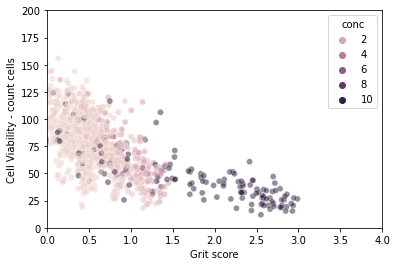

In [83]:
sns.scatterplot(x=df['grit'], y=df['ObjectNumber_cells_norm'], hue=df['conc'], alpha=0.5)
plt.xlim([0, 4])
plt.ylim([0, 200])
plt.xlabel('Grit score')
plt.ylabel('Cell Viability - count cells')

#plt.annotate('some value', (1.6,130))

Text(0, 0.5, 'Cell Viability - count nuclei')

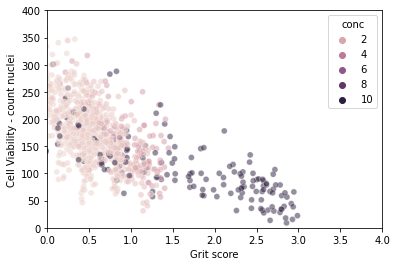

In [84]:
sns.scatterplot(x=df['grit'], y=df['ObjectNumber_nuclei_norm'], hue=df['conc'], alpha=0.5)
plt.xlim([0, 4])
plt.ylim([0, 400])
plt.xlabel('Grit score')
plt.ylabel('Cell Viability - count nuclei')

Text(0, 0.5, 'Cell Viability - count nuclei2')

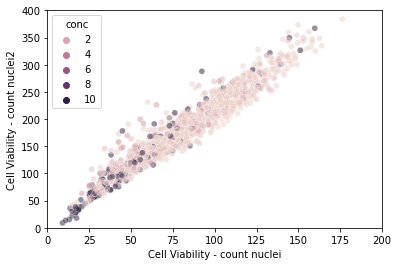

In [85]:
sns.scatterplot(x=df['Count_nuclei_norm'], y=df['ObjectNumber_nuclei_norm'], hue=df['conc'], alpha=0.5)
plt.xlim([0, 200])
plt.ylim([0, 400])
plt.xlabel('Cell Viability - count nuclei')
plt.ylabel('Cell Viability - count nuclei2')